In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

In [2]:
achyranthus = pd.read_csv(r"./research_data/achyranthus_aserpa.csv")
vitex = pd.read_csv(r"./research_data/vitex_negundo_correct.csv")
bacillus = pd.read_csv(r"./research_data/bmegaterium.csv")
pseudomonas = pd.read_csv(r"./research_data/pfluorescens.csv")

In [3]:
agents = [achyranthus, vitex, bacillus, pseudomonas]

In [4]:
pseudomonas.columns

Index(['days', '10^6', '10^5', '10^4', '10^3', 'sterile water', 'positive'], dtype='object')

In [5]:
bacillus.columns

Index(['days', '10^6', '10^5', '10^4', '10^3', 'sterile water', 'positive'], dtype='object')

In [6]:
vitex.columns

Index(['days', '10^6', '10^5', '10^4', '10^3', 'sterile water', 'positive'], dtype='object')

In [7]:
achyranthus.columns

Index(['days', '10^6', '10^5', '10^4', '10^3', 'sterile water', 'positive'], dtype='object')

In [8]:
# Hypotheses

# For each control agent prove that the control agent causes a significant reduction in symptom development.
# Ignore the negative control.
# Use the positive control as reference.

# Null hypothesis -> 
# There is no significant difference in the degree of symptom development between the experimental setups and positive control
# Alternative hypothesis -> 
# There is a significant difference in the degree of symptom development between the experimental setups and positive control

In [3]:
achyranthus

,days,10^6,10^5,10^4,10^3,sterile water,positive
0,0,0.00,0,0.000000,0.000000,0,0.00
1,3,0.00,0,0.000000,0.000000,0,0.00
2,4,0.00,0,0.000000,0.000000,0,0.00
3,6,0.01,0,0.000000,0.000000,0,0.40
4,7,0.01,0,0.000000,0.000000,0,0.72
5,10,0.10,0,0.003333,0.000000,0,0.85
6,12,0.18,0,0.003333,0.000000,0,0.86
7,13,0.20,0,0.003333,0.016667,0,0.91
8,16,0.20,0,0.003333,0.033333,0,0.94


In [9]:
[df["days"].values for df in agents]

[array([ 0,  3,  4,  6,  7, 10, 12, 13, 16], dtype=int64),
 array([ 3,  4,  6,  7, 10, 12, 13, 16], dtype=int64),
 array([ 0,  2,  4,  8, 13], dtype=int64),
 array([ 0,  1,  4,  6,  8, 12, 16], dtype=int64)]

In [10]:
# since we did not take the measurements every day or in constant interval, comparing these raw readings will definitely lead to misleading 
# results.
# lets prepare a series of daily increments of disease rate (this will normalize the measures)

In [11]:
vitex

,days,10^6,10^5,10^4,10^3,sterile water,positive
0,3,0.00,0.000000,0.000000,0.000000,0.000,0.00
1,4,0.00,0.000000,0.000000,0.000000,0.000,0.00
2,6,0.01,0.020000,0.110000,0.006667,0.000,0.40
3,7,0.04,0.143333,0.250000,0.043333,0.020,0.72
4,10,0.04,0.186667,0.316667,0.080000,0.050,0.85
5,12,0.04,0.266667,0.383333,0.126667,0.100,0.86
6,13,0.04,0.273333,0.450000,0.130000,0.145,0.91
7,16,0.05,0.423333,0.473333,0.163333,0.160,0.94


In [12]:
vitex.diff().dropna(axis = 0)   #.days

,days,10^6,10^5,10^4,10^3,sterile water,positive
1,1.0,0.00,0.000000,0.000000,0.000000,0.000,0.00
2,2.0,0.01,0.020000,0.110000,0.006667,0.000,0.40
3,1.0,0.03,0.123333,0.140000,0.036667,0.020,0.32
4,3.0,0.00,0.043333,0.066667,0.036667,0.030,0.13
5,2.0,0.00,0.080000,0.066667,0.046667,0.050,0.01
6,1.0,0.00,0.006667,0.066667,0.003333,0.045,0.05
7,3.0,0.01,0.150000,0.023333,0.033333,0.015,0.03


In [13]:
vitex.diff().dropna(axis = 0).divide(vitex.diff().dropna().days.values, axis = "rows")

,days,10^6,10^5,10^4,10^3,sterile water,positive
1,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
2,1.0,0.005000,0.010000,0.055000,0.003333,0.000,0.200000
3,1.0,0.030000,0.123333,0.140000,0.036667,0.020,0.320000
4,1.0,0.000000,0.014444,0.022222,0.012222,0.010,0.043333
5,1.0,0.000000,0.040000,0.033333,0.023333,0.025,0.005000
6,1.0,0.000000,0.006667,0.066667,0.003333,0.045,0.050000
7,1.0,0.003333,0.050000,0.007778,0.011111,0.005,0.010000


In [14]:
vitex.columns

Index(['days', '10^6', '10^5', '10^4', '10^3', 'sterile water', 'positive'], dtype='object')

In [15]:
vitex.diff().dropna(axis = 0).divide(vitex.diff().dropna().days.values, axis = "rows").mean(axis = 0)

days             1.000000
10^6             0.005476
10^5             0.034921
10^4             0.046429
10^3             0.012857
sterile water    0.015000
positive         0.089762
dtype: float64

In [16]:
def normalized_columns(data: pd.DataFrame, columns : list[str]) -> list[np.array]:
    data = data.loc[:, columns]
    data = data.diff().dropna(axis = 0).divide(data.diff().dropna().days.values, axis = "rows")
    return np.array(data.loc[:, columns[1]].values, dtype = np.float64), np.array(data.loc[:, columns[2]].values, dtype = np.float64),\
           np.array(data.loc[:, columns[3]].values, dtype = np.float64), np.array(data.loc[:, columns[4]].values, dtype = np.float64),\
           np.array(data.loc[:, columns[5]].values, dtype = np.float64)

In [17]:
*dils, pos = normalized_columns(bacillus, columns = ['days', '10^6', '10^5', '10^4', '10^3', 'positive'])

***Because the F-distribution assumes that the null hypothesis is true, we can place the F-value from our study in the F-distribution to determine how consistent our results are with the null hypothesis and to calculate probabilities.***

***The probability that we want to calculate is the probability of observing an F-statistic that is at least as high as the value that our study obtained. That probability allows us to determine how common or rare our F-value is under the assumption that the null hypothesis is true. If the probability is low enough, we can conclude that our data is inconsistent with the null hypothesis. The evidence in the sample data is strong enough to reject the null hypothesis for the entire population.***

In [90]:
def get_pvalues(tests: list[np.array], control: np.array) -> list[float]:
    return [f_oneway(test, control)[1] for test in tests]

In [91]:
get_pvalues(dils, pos)

[0.11472276316560334,
 0.13759286593211442,
 0.12859274685988548,
 0.12056921949223508]

In [92]:
for data in agents:
    *tests, control = normalized_columns(data, ['days', '10^6', '10^5', '10^4', '10^3', 'positive'])
    dilutions = ['10^6', '10^5', '10^4', '10^3']
    print({dilution: pval for (dilution, pval) in zip(dilutions, get_pvalues(tests, control))})

{'10^6': 0.13579424889470942, '10^5': 0.0808180255226012, '10^4': 0.0813014977686026, '10^3': 0.09133007215814419}
{'10^6': 0.09564069132396073, '10^5': 0.2867405763711741, '10^4': 0.40126115694244063, '10^3': 0.12539308813115171}
{'10^6': 0.11472276316560334, '10^5': 0.13759286593211442, '10^4': 0.12859274685988548, '10^3': 0.12056921949223508}
{'10^6': 0.22283355925605006, '10^5': 0.0901413606412266, '10^4': 0.44016306997830273, '10^3': 0.041405016328807075}


In [93]:
# agents = [achyranthus, vitex, bacillus, pseudomonas]

# ***ANOVA considering all experimental setups (dilutions, negative control and positive control)***
-----------------------

In [95]:
data = achyranthus.diff(axis = 0).dropna(axis = 0)
data = data.div(data.days, axis = 0).drop("days", axis = 1).T.to_numpy()
f_oneway(data[0], data[1], data[2], data[3], data[4], data[5])

F_onewayResult(statistic=3.282965894083973, pvalue=0.01364122748917126)

In [96]:
data = vitex.diff(axis = 0).dropna(axis = 0)
data = data.div(data.days, axis = 0).drop("days", axis = 1).T.to_numpy()
f_oneway(data[0], data[1], data[2], data[3], data[4], data[5])

F_onewayResult(statistic=2.0759645976653354, pvalue=0.09116215968896095)

In [97]:
data = bacillus.diff(axis = 0).dropna(axis = 0)
data = data.div(data.days, axis = 0).drop("days", axis = 1).T.to_numpy()
f_oneway(data[0], data[1], data[2], data[3], data[4], data[5])

F_onewayResult(statistic=2.950138056430449, pvalue=0.0406938150887021)

In [98]:
data = pseudomonas.diff(axis = 0).dropna(axis = 0)
data = data.div(data.days, axis = 0).drop("days", axis = 1).T.to_numpy()
f_oneway(data[0], data[1], data[2], data[3], data[4], data[5])

F_onewayResult(statistic=2.6994180405273616, pvalue=0.03952893635521616)

In [5]:
# Tests are all from x10^4 dilution.

p_values = {
    "Positive control": 0.93,
    "Pseudomonas fluorescens": 0.5,
    "Bacillus megaterium": 0.09,
    "Vitex negundo": 0.47,
    "Achyranthus aserpa": 0.0033
}

std_err = {
    "Positive control": 0.01,
    "Pseudomonas fluorescens": 0.2309,
    "Bacillus megaterium": 0.03215,
    "Vitex negundo": 0.17901,
    "Achyranthus aserpa": 0.00333
}

labels = {
    "Positive control": "B",
    "Pseudomonas fluorescens": "AB",
    "Bacillus megaterium": "A",
    "Vitex negundo": "AB",
    "Achyranthus aserpa": "A"
}

In [9]:
stats = pd.DataFrame([p_values, std_err, labels], index = ["pvalue", "stderr", "label"])
stats

,Positive control,Pseudomonas fluorescens,Bacillus megaterium,Vitex negundo,Achyranthus aserpa
pvalue,0.93,0.5,0.09,0.47,0.0033
stderr,0.01,0.2309,0.03215,0.17901,0.00333
label,B,AB,A,AB,A


In [55]:
p_values.keys()

dict_keys(['Positive control', 'Pseudomonas fluorescens', 'Bacillus megaterium', 'Vitex negundo', 'Achyranthus aserpa'])

In [65]:
(stats.loc["pvalue", :] + stats.loc["stderr", :]).values

array([0.9400000000000001, 0.7309, 0.12215, 0.64901,
       0.0066300000000000005], dtype=object)

In [81]:
axes.get_xticks()

array([0, 1, 2, 3, 4])

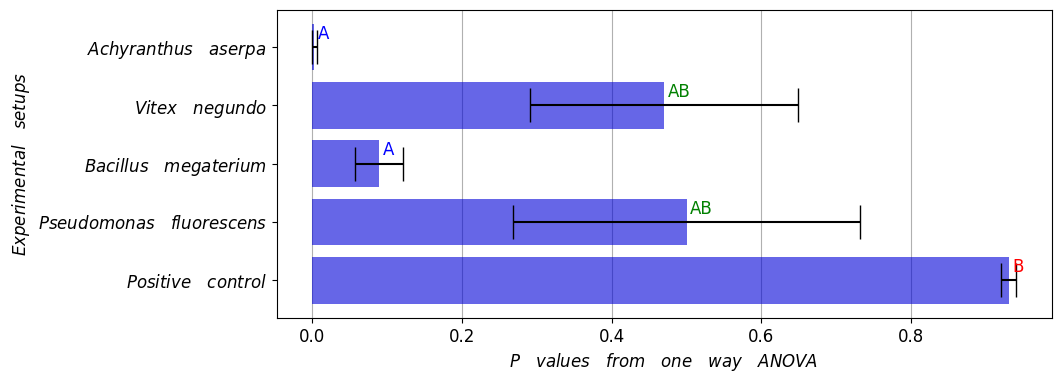

In [152]:
plt.rcParams["font.size"] = 12
fig, axes = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 4)
axes.barh(y = stats.columns, width = stats.loc["pvalue", :], color = "#0001D8", alpha = 0.6)
axes.errorbar(y = stats.columns, x = stats.loc["pvalue", :], xerr = stats.loc["stderr", :],
              ecolor = "black", capsize = 12, linestyle = "None")
axes.set_xlabel("$P\hspace{1}values\hspace{1}from\hspace{1}one\hspace{1}way\hspace{1}ANOVA$")
axes.set_ylabel("$Experimental\hspace{1}setups$")
axes.set_yticks(ticks = axes.get_yticks(), labels = ["$Positive\hspace{1}control$", "$Pseudomonas\hspace{1}fluorescens$",
                                                     "$Bacillus\hspace{1}megaterium$", "$Vitex\hspace{1}negundo$",
                                                     "$Achyranthus\hspace{1}aserpa$"])

labels_x = stats.loc["pvalue", :].values + 0.005
labels_y = axes.get_yticks() + 0.15
label_colors = ["red", "green", "blue", "green", "blue"]
for (x, y, label, clabel) in zip(labels_x, labels_y, stats.loc["label", :], label_colors):
    axes.text(x = x, y = y, s = label, color = clabel)
    
axes.grid(axis = "x", which = "both")
axes.set_axisbelow(True)
# plt.tight_layout()
# plt.show()
plt.savefig("./anova.jpeg", dpi = 200, format = "jpeg", bbox_inches = "tight")